In [6]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def remove_noise(im: np.ndarray) -> np.ndarray:
    """
        A function that removes noise in the input image.
        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
        return:
            (np.ndarray) of shape (H, W). dtype=bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions

    # Remoev foreground noise
    B = skimage.morphology.disk(7)
    im = skimage.morphology.binary_erosion(im, B)

    # Remove background noise
    B = skimage.morphology.disk(15)
    im = skimage.morphology.binary_closing(im, B)

    return im
    ### END YOUR CODE HERE ### 

Reading image: images/noisy.png
Saving image to: image_processed/noisy-filtered.png


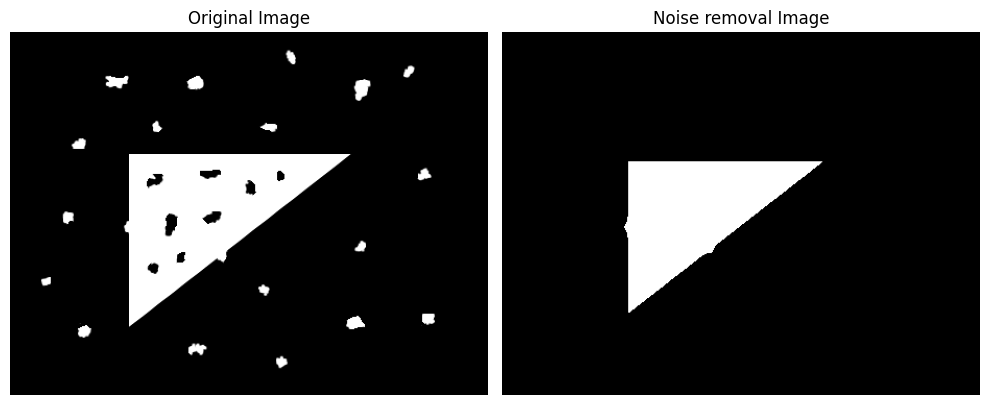

In [47]:
if __name__ == "__main__":
        # DO NOT CHANGE
        im = utils.read_image("noisy.png")
        noisy = im

        binary_image = (im != 0)
        noise_free_image = remove_noise(binary_image)

        assert im.shape == noise_free_image.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
        im.shape, noise_free_image.shape)
        assert noise_free_image.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
        noise_free_image.dtype)

        noise_free_image = utils.to_uint8(noise_free_image)
        # display the image in the notebook
        utils.save_im("noisy-filtered.png", noise_free_image)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        ax = axes.ravel()

        ax[0].imshow(noisy, cmap='gray')
        ax[0].set_title("Original Image")
        ax[1].imshow(noise_free_image, cmap='gray')
        ax[1].set_title("Noise removal Image")

        for a in ax:
                a.axis('off')

        plt.tight_layout()
        plt.show()
